In [ ]:
!pip install feature_engine

     |████████████████████████████████| 180 kB 33.1 MB/s 
     |████████████████████████████████| 9.5 MB 37.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import models
from zipfile import ZipFile
from sklearn.datasets import load_breast_cancer
from scipy.stats import chi2_contingency
from datetime import datetime
from xgboost import XGBClassifier
import scipy

#from feature_engine import OrdinalEncoder

In [ ]:
with ZipFile('/content/drive/My Drive/Electronic_Price_Prediction/Used_Electronics_Participants_Data.zip','r') as f:
  f.extractall()

In [ ]:
train=pd.read_csv('train.csv')


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

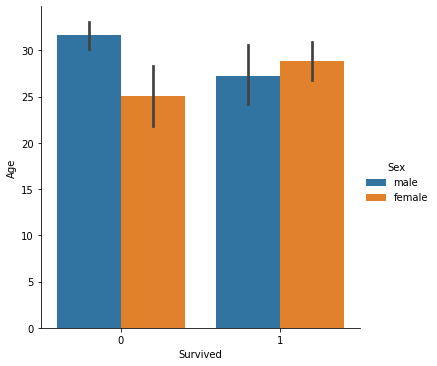

In [ ]:
sns.catplot(x='Survived',y='Age',data=train,hue='Sex',kind='bar')

In [ ]:
#plt.figure(figsize=(30,10))
train.Ticket.value_counts().sort_values(ascending=False)

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
349203      1
233639      1
234604      1
PC 17590    1
PC 17595    1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
train['Family_member']=train.groupby('Ticket').Ticket.transform(lambda x: x.count())

In [ ]:
train.groupby('Cabin').Cabin.count().sort_values(ascending=False)

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
D19            1
D21            1
D28            1
D30            1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train['Cabin']=train.Cabin.fillna('B96 B98')

In [ ]:
train.Cabin.value_counts()

B96 B98        691
C23 C25 C27      4
G6               4
F33              3
E101             3
              ... 
C99              1
D45              1
E40              1
D11              1
D19              1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train.Cabin.to_frame().describe(include='object')

,Cabin
count,204
unique,147
top,C23 C25 C27
freq,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [ ]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Family_member      0
dtype: int64

In [ ]:
train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [ ]:
data=train.copy()

In [ ]:
target=train.Survived

In [ ]:
train.drop('Survived',axis=1,inplace=True)

In [ ]:
categorical_transformer=make_pipeline(mdi.CategoricalVariableImputer(),ce.OrdinalCategoricalEncoder())

In [ ]:
numerical_transformer=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())

In [ ]:
transformer=ColumnTransformer([('categorical_transformer',categorical_transformer,selector(dtype_include=object)),('numerical_transformer',numerical_transformer,selector(dtype_exclude=object))])


In [ ]:
model=XGBClassifier(n_estimators=100)#GradientBoostingClassifier(n_estimators=100)#RandomForestClassifier()

In [ ]:
pipeline=make_pipeline(transformer,model)

In [ ]:
grid=GridSearchCV(pipeline,cv=5,param_grid={},return_train_score=True)

In [ ]:
grid.fit(train,target)

In [ ]:
encoder_1=ce.OrdinalCategoricalEncoder()
encoder_2=OrdinalEncoder()

In [ ]:
mdi.CategoricalVariableImputer()

In [ ]:
grid.score(train,target)

0.9921436588103255

In [ ]:
prediction=grid.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/feature_engine/base_transformers.py:91: UserWarning: NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories does not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.
  "NaN values were introduced in the returned dataframe by the encoder."


In [ ]:
prediction

In [ ]:
final_test['Segmentation']=prediction

In [ ]:
submission['Survived']=prediction

In [ ]:
a=np.random.random(10).reshape(2,5)
b=np.random.random(10).reshape(2,5)

In [ ]:
submission.to_csv("submission_{}.csv".format(6),index=False)

In [ ]:
x={a:b for (a,b) in [(1,2),(2,3)]}
y={a:b for (a,b) in [(1,'a')]}

In [ ]:
x={1:'a',2:'b',3:'c'}

In [ ]:
y=dict(zip(range(1,5),list('pawan')))

In [ ]:
{i:y[i]for i in x.keys() if i in y.keys()}

{1: 'p', 2: 'a', 3: 'w'}

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
n=np.random.randn(10,3,2)

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

In [ ]:
from sklearn import cluster

In [ ]:
n=-2*np.random.rand(100,2)
n[50:100,:]=1+2*np.random.rand(50,2)

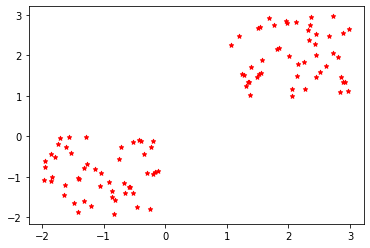

In [ ]:
cluster=KMeans(2)

In [ ]:
cluster.fit_transform(n)

In [ ]:
np.unique(cluster.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([50, 50]))

In [ ]:
centers=cluster.cluster_centers_

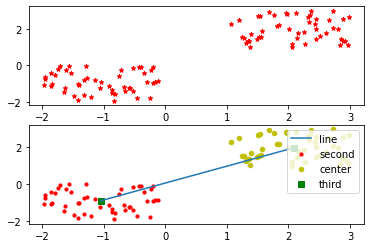

In [ ]:
plt.subplot(2,1,1)
plt.scatter(n[:,0],n[:,1],c='r',s=20,marker='*')
plt.subplot(2,1,2)
plt.scatter(n[:50,0],n[:50,1],c='r',s=10,marker='o')
plt.scatter(n[50:100,0],n[50:100,1],c='y',s=20,marker='o')
plt.scatter(centers[:,0],centers[:,1],c='g',s=30,marker='s')
plt.plot(centers[:,0],centers[:,1])
plt.legend(['line','second','center','third'],loc='upper right')
plt.ylabel='pawan'
plt.show()


In [ ]:
cluster.cluster_centers_

array([[-0.97421642, -1.06119557],
       [ 1.98605433,  1.87634571]])

In [ ]:
#@title Default title text
cluster=AgglomerativeClustering()

In [ ]:
cluster.fit(n)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
cluster=DBSCAN(eps=.5,min_samples=3)

In [ ]:
cluster.fit(n)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [ ]:
pairwise_distances(np.array(['12345','66666']).reshape(-1,1),metric='hamming')

array([[0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
pairwise_distances(n)

array([[0.        , 0.66223445, 0.49483634, ..., 4.70186011, 5.47272859,
        4.75170081],
       [0.66223445, 0.        , 0.21436381, ..., 4.56233985, 5.17733412,
        4.43836072],
       [0.49483634, 0.21436381, 0.        , ..., 4.70453038, 5.35574975,
        4.61954683],
       ...,
       [4.70186011, 4.56233985, 4.70453038, ..., 0.        , 1.41983087,
        1.29044214],
       [5.47272859, 5.17733412, 5.35574975, ..., 1.41983087, 0.        ,
        0.74669417],
       [4.75170081, 4.43836072, 4.61954683, ..., 1.29044214, 0.74669417,
        0.        ]])